### Lection 4 week 7

In [1]:
#!pip install pandas_profiling

In [2]:
import math
import random
import numpy as np

# import pandas for structuring the data
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sns
import glob
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Other utilities
from sklearn import datasets, preprocessing, metrics

In [3]:
import pandas_profiling

In [4]:
pwd

'C:\\Users\\Nmtur\\PycharmProjects\\cphbusiness 2-semester\\jupyter_notebook\\Jupyter_notebook_Data_Science'

In [5]:
red_wine = pd.read_excel('winequality-red.xlsx', skiprows=1)
white_wine = pd.read_excel('winequality-white.xlsx', skiprows=1)

## Joining datasets

In [6]:
red_wine['type'] = 'red'

In [7]:
white_wine['type'] = 'white'

In [8]:
wine_set = [red_wine, white_wine]

In [9]:
all_wines = pd.concat(wine_set)

In [10]:
profile = ProfileReport(all_wines, title="Collection of Wine")

In [11]:
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [12]:
all_wines.tail()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [13]:
all_wines.reset_index(drop=True, inplace=True)

In [14]:
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [15]:
all_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


## 3 Explore the general parameters of the new file:
• number of rows and columns

• type of data in each column

• descriptive statstics of the numeric data (count, mean, min, max, std, quantiles)

In [16]:
# See rows and columns

all_wines.shape

(6497, 13)

### 2 Ways of showing columns

In [17]:
all_wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')

In [18]:
list(all_wines)

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type']

### The type of data in each columns

In [19]:
# Type of data in each row
all_wines.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

### Descriptive data of the wines

In [20]:
all_wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Count of the data in the wine file

In [21]:
all_wines.count()

fixed acidity           6497
volatile acidity        6497
citric acid             6497
residual sugar          6497
chlorides               6497
free sulfur dioxide     6497
total sulfur dioxide    6497
density                 6497
pH                      6497
sulphates               6497
alcohol                 6497
quality                 6497
type                    6497
dtype: int64

### Mean of the columns

In [22]:
all_wines.mean()

C:\Users\Nmtur\AppData\Local\Temp/ipykernel_13284/454274112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_wines.mean()


fixed acidity             7.215307
volatile acidity          0.339666
citric acid               0.318633
residual sugar            5.443235
chlorides                 0.056034
free sulfur dioxide      30.525319
total sulfur dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

### min value of the columns

In [23]:
all_wines.min()

fixed acidity               3.8
volatile acidity           0.08
citric acid                 0.0
residual sugar              0.6
chlorides                 0.009
free sulfur dioxide         1.0
total sulfur dioxide        6.0
density                 0.98711
pH                         2.72
sulphates                  0.22
alcohol                     8.0
quality                       3
type                        red
dtype: object

### max value of the columns

In [24]:
all_wines.max()

fixed acidity              15.9
volatile acidity           1.58
citric acid                1.66
residual sugar             65.8
chlorides                 0.611
free sulfur dioxide       289.0
total sulfur dioxide      440.0
density                 1.03898
pH                         4.01
sulphates                   2.0
alcohol                    14.9
quality                       9
type                      white
dtype: object

### standard deviation (std) of the wine

In [25]:
all_wines.std()

C:\Users\Nmtur\AppData\Local\Temp/ipykernel_13284/852816979.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  all_wines.std()


fixed acidity            1.296434
volatile acidity         0.164636
citric acid              0.145318
residual sugar           4.757804
chlorides                0.035034
free sulfur dioxide     17.749400
total sulfur dioxide    56.521855
density                  0.002999
pH                       0.160787
sulphates                0.148806
alcohol                  1.192712
quality                  0.873255
dtype: float64

### Quantile of the dataset - How much of the full date is filled by what

In [26]:
all_wines.quantile()

fixed acidity             7.00000
volatile acidity          0.29000
citric acid               0.31000
residual sugar            3.00000
chlorides                 0.04700
free sulfur dioxide      29.00000
total sulfur dioxide    118.00000
density                   0.99489
pH                        3.21000
sulphates                 0.51000
alcohol                  10.30000
quality                   6.00000
Name: 0.5, dtype: float64

### 4 Plot Diagrams

Plot diagrams that visualize the differences in red and white wines. 

What do your diagrams show? 

Can you tell which type of wine has higher average quality? 

Which type of wine has higher average level of alcohol? 

Which one has higher average quantity of residual sugar?

<AxesSubplot:>

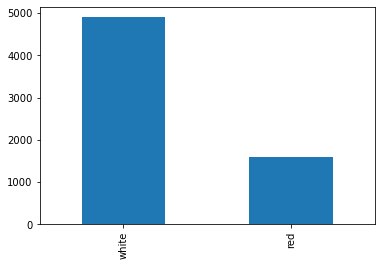

In [27]:
 all_wines['type'].value_counts().plot(kind='bar')

As shown above, there are a lot more red wine in the data set than white wine

###### Which type of wine has the highest average quality?

In [28]:
wine_quality = all_wines.groupby('type').mean()
wine_quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
type,,,,,,,,,,,,
red,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
white,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909


<AxesSubplot:title={'center':'Quality of wine'}, xlabel='type', ylabel='Average Quality'>

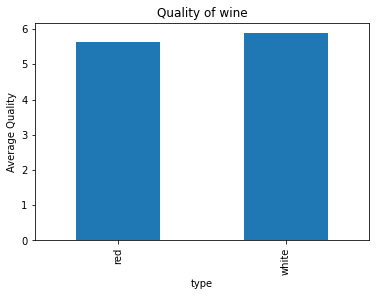

In [29]:
# plot of highest average quality
plt.title("Quality of wine")
plt.ylabel("Average Quality")
wine_quality['quality'].plot.bar()

In [30]:
wine_quality['quality'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of type
red      5.636023
white    5.877909
Name: quality, dtype: float64>

We can see that the quality of white wine is slightly better than the quality of red wine.

white wine has a mean of 5.87 in quality while read has 5.63

###### Which wine has highest average alcohol

<AxesSubplot:title={'center':'Alcohol in wine'}, xlabel='type', ylabel='Average Alcohol'>

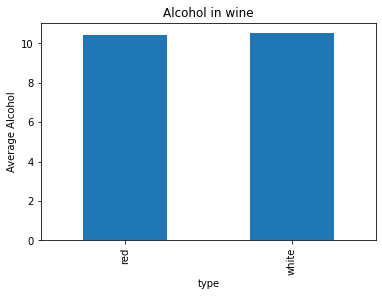

In [31]:
# plot of highest average alcohol
plt.title("Alcohol in wine")
plt.ylabel("Average Alcohol")
wine_quality['alcohol'].plot.bar()

In [32]:
wine_quality['alcohol'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of type
red      10.422983
white    10.514267
Name: alcohol, dtype: float64>

The average alcohol in both Red and white wine are almost the same.

red wine averages to 10.422983

white wine average to 10.514267

###### Highest avarage quantity of average sugar

<AxesSubplot:title={'center':'Sugar in wine'}, xlabel='type', ylabel='Average quantity of sugar'>

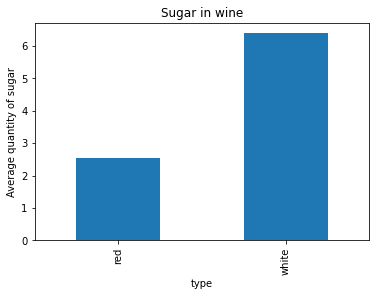

In [33]:
# plot of highest quantity of average sugar
plt.title("Sugar in wine")
plt.ylabel("Average quantity of sugar")
wine_quality['residual sugar'].plot.bar()

In [34]:
wine_quality['residual sugar'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of type
red      2.538806
white    6.391415
Name: residual sugar, dtype: float64>

White wine has a bigger quantity of sugar by a large margin.

## 5 Subsets

Split the data into five subsets by binning the attribute pH. 

Identify the subset with the highest density? 

What if you split the data in ten subsets?

##### Binning the attribute pH

In [35]:
bins = [0,2,5,8,11,14]
wine_ph = all_wines.groupby([(pd.cut(all_wines.pH, bins))]).count()
wine_ph

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
pH,,,,,,,,,,,,,
"(0, 2]",0,0,0,0,0,0,0,0,0,0,0,0,0
"(2, 5]",6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497
"(5, 8]",0,0,0,0,0,0,0,0,0,0,0,0,0
"(8, 11]",0,0,0,0,0,0,0,0,0,0,0,0,0
"(11, 14]",0,0,0,0,0,0,0,0,0,0,0,0,0


As seen above, by splitting into 5 subsets, all wine pH values are between 2 and 5. This means that splitting the pH scale into 5 subsets of our own choice ,ight not be the best idea. Next we tell pandas to select 5 subsets for us.

In [36]:
wine_ph = all_wines.groupby([(pd.cut(all_wines.pH, bins=5)), 'type']).count()
wine_ph

fixed acidity  volatile acidity  citric acid  \
pH             type                                                  
(2.719, 2.978] red               22                22           22   
               white            328               328          328   
(2.978, 3.236] red              473               473          473   
               white           2871              2871         2871   
(3.236, 3.494] red              922               922          922   
               white           1543              1543         1543   
(3.494, 3.752] red              175               175          175   
               white            147               147          147   
(3.752, 4.01]  red                7                 7            7   
               white              9                 9            9   

                      residual sugar  chlorides  free sulfur dioxide  \
pH             type                                                    
(2.719, 2.978] red                22         22                   22   
               white             328        328                  328   
(2.978, 3.236] red               473        473                  473   
               white            2871       2871                 2871   
(3.236, 3.494] red               922        922                  922   
               white            1543       1543                 1543   
(3.494, 3.752] red               175        175                  175   
               white             147        147                  147   
(3.752, 4.01]  red                 7          7                    7   
               white               9          9                    9   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
pH             type                                                             
(2.719, 2.978] red                      22       22    22         22       22   
               white                   328      328   328        328      328   
(2.978, 3.236] red                     473      473   473        473      473   
               white                  2871     2871  2871       2871     2871   
(3.236, 3.494] red                     922      922   922        922      922   
               white                  1543     1543  1543       1543     1543   
(3.494, 3.752] red                     175      175   175        175      175   
               white                   147      147   147        147      147   
(3.752, 4.01]  red                       7        7     7          7        7   
               white                     9        9     9          9        9   

                      quality  
pH             type            
(2.719, 2.978] red         22  
               white      328  
(2.978, 3.236] red        473  
               white     2871  
(3.236, 3.494] red        922  
               white     1543  
(3.494, 3.752] red        175  
               white      147  
(3.752, 4.01]  red          7  
               white        9

This helps us a bit more. Let's try plotting it in a bar diagram

<AxesSubplot:xlabel='pH,type'>

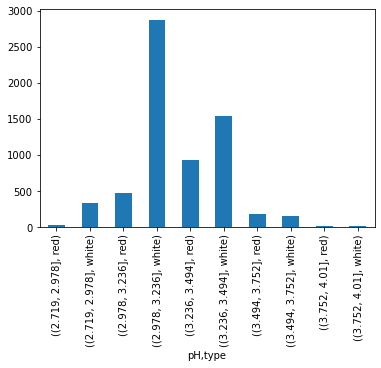

In [37]:
wine_ph['pH'].plot.bar()

#### Getting the density frum the subsets can be done in two ways, the one subset with average highest density, or the groupe that has one wine with the highest density

#### First lets take the average

In [38]:
wine_ph_dens = all_wines.groupby([(pd.cut(all_wines.pH, bins=5))]).mean()
wine_ph_dens

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
pH,,,,,,,,,,,,
"(2.719, 2.978]",7.758857,0.276329,0.372229,7.614286,0.054357,31.241429,124.741429,0.994801,2.921286,0.490543,10.221905,5.800000
"(2.978, 3.236]",7.398236,0.311262,0.350700,6.310422,0.054819,33.195873,127.955443,0.994679,3.126414,0.510323,10.397088,5.786782
"(3.236, 3.494]",7.011298,0.370456,0.283185,4.283266,0.057230,27.518053,101.632657,0.994688,3.335785,0.556357,10.608195,5.877485
"(3.494, 3.752]",6.378571,0.464736,0.205714,3.140062,0.061562,25.231366,87.874224,0.994887,3.569565,0.598602,10.830745,5.711180
"(3.752, 4.01]",5.362500,0.400938,0.178125,1.768750,0.050938,26.562500,101.875000,0.993582,3.831875,0.579375,11.437500,5.875000


In [39]:
wine_ph_dens.groupby('density').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
density,,,,,,,,,,,
0.993582,5.362500,0.400938,0.178125,1.768750,0.050938,26.562500,101.875000,3.831875,0.579375,11.437500,5.875000
0.994679,7.398236,0.311262,0.350700,6.310422,0.054819,33.195873,127.955443,3.126414,0.510323,10.397088,5.786782
0.994688,7.011298,0.370456,0.283185,4.283266,0.057230,27.518053,101.632657,3.335785,0.556357,10.608195,5.877485
0.994801,7.758857,0.276329,0.372229,7.614286,0.054357,31.241429,124.741429,2.921286,0.490543,10.221905,5.800000
0.994887,6.378571,0.464736,0.205714,3.140062,0.061562,25.231366,87.874224,3.569565,0.598602,10.830745,5.711180


#### Now lets find the one wine

In [40]:
wine_ph_dens2 = all_wines.groupby([(pd.cut(all_wines.pH, bins=5))]).max()
wine_ph_dens2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
pH,,,,,,,,,,,,,
"(2.719, 2.978]",15.6,0.76,1.00,22.00,0.610,124.0,256.0,1.00320,2.97,2.00,13.60,8,white
"(2.978, 3.236]",15.9,1.24,1.23,31.60,0.611,131.0,366.5,1.01030,3.23,1.61,14.90,9,white
"(3.236, 3.494]",13.0,1.18,1.66,65.80,0.358,289.0,440.0,1.03898,3.49,1.56,14.05,9,white
"(3.494, 3.752]",9.6,1.58,0.74,19.40,0.172,138.5,272.0,1.00040,3.75,0.96,14.00,8,white
"(3.752, 4.01]",6.4,0.74,0.34,5.15,0.092,69.0,178.0,0.99590,4.01,0.66,13.10,7,white


In [41]:
wine_ph_dens2.groupby('density').max()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,type
density,,,,,,,,,,,,
0.99590,6.4,0.74,0.34,5.15,0.092,69.0,178.0,4.01,0.66,13.10,7,white
1.00040,9.6,1.58,0.74,19.40,0.172,138.5,272.0,3.75,0.96,14.00,8,white
1.00320,15.6,0.76,1.00,22.00,0.610,124.0,256.0,2.97,2.00,13.60,8,white
1.01030,15.9,1.24,1.23,31.60,0.611,131.0,366.5,3.23,1.61,14.90,9,white
1.03898,13.0,1.18,1.66,65.80,0.358,289.0,440.0,3.49,1.56,14.05,9,white


#### Splitting into 10 subsets

In [42]:
wine_ph2 = all_wines.groupby([(pd.cut(all_wines.pH, bins=10)), 'type']).count()
wine_ph2

fixed acidity  volatile acidity  citric acid  \
pH             type                                                  
(2.719, 2.849] red                1                 1            1   
               white             15                15           15   
(2.849, 2.978] red               21                21           21   
               white            313               313          313   
(2.978, 3.107] red              112               112          112   
               white           1121              1121         1121   
(3.107, 3.236] red              361               361          361   
               white           1750              1750         1750   
(3.236, 3.365] red              547               547          547   
               white           1116              1116         1116   
(3.365, 3.494] red              375               375          375   
               white            427               427          427   
(3.494, 3.623] red              146               146          146   
               white            117               117          117   
(3.623, 3.752] red               29                29           29   
               white             30                30           30   
(3.752, 3.881] red                3                 3            3   
               white              9                 9            9   
(3.881, 4.01]  red                4                 4            4   
               white              0                 0            0   

                      residual sugar  chlorides  free sulfur dioxide  \
pH             type                                                    
(2.719, 2.849] red                 1          1                    1   
               white              15         15                   15   
(2.849, 2.978] red                21         21                   21   
               white             313        313                  313   
(2.978, 3.107] red               112        112                  112   
               white            1121       1121                 1121   
(3.107, 3.236] red               361        361                  361   
               white            1750       1750                 1750   
(3.236, 3.365] red               547        547                  547   
               white            1116       1116                 1116   
(3.365, 3.494] red               375        375                  375   
               white             427        427                  427   
(3.494, 3.623] red               146        146                  146   
               white             117        117                  117   
(3.623, 3.752] red                29         29                   29   
               white              30         30                   30   
(3.752, 3.881] red                 3          3                    3   
               white               9          9                    9   
(3.881, 4.01]  red                 4          4                    4   
               white               0          0                    0   

                      total sulfur dioxide  density    pH  sulphates  alcohol  \
pH             type                                                             
(2.719, 2.849] red                       1        1     1          1        1   
               white                    15       15    15         15       15   
(2.849, 2.978] red                      21       21    21         21       21   
               white                   313      313   313        313      313   
(2.978, 3.107] red                     112      112   112        112      112   
               white                  1121     1121  1121       1121     1121   
(3.107, 3.236] red                     361      361   361        361      361   
               white                  1750     1750  1750       1750     1750   
(3.236, 3.365] red                     547      547   547        547      547   
     

<AxesSubplot:xlabel='pH,type'>

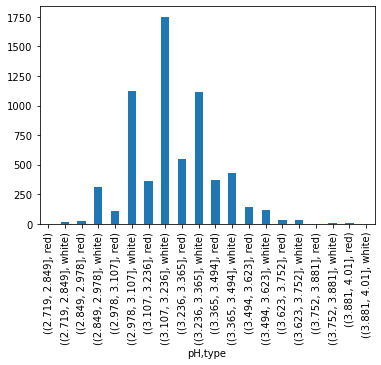

In [43]:
wine_ph2['pH'].plot.bar()

## 6. Use the function corr() to create a correlation matrix of all data and investigate it. 

Can you tell which vine attribute has the biggest influence on the wine quality. 

Do you get the same results when you analyze the red and white wine data sets separately?

In [44]:
coormat = all_wines.corr()
coormat

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


Above is shown a correlation matrix.

Below is a heatmap of the same numbers


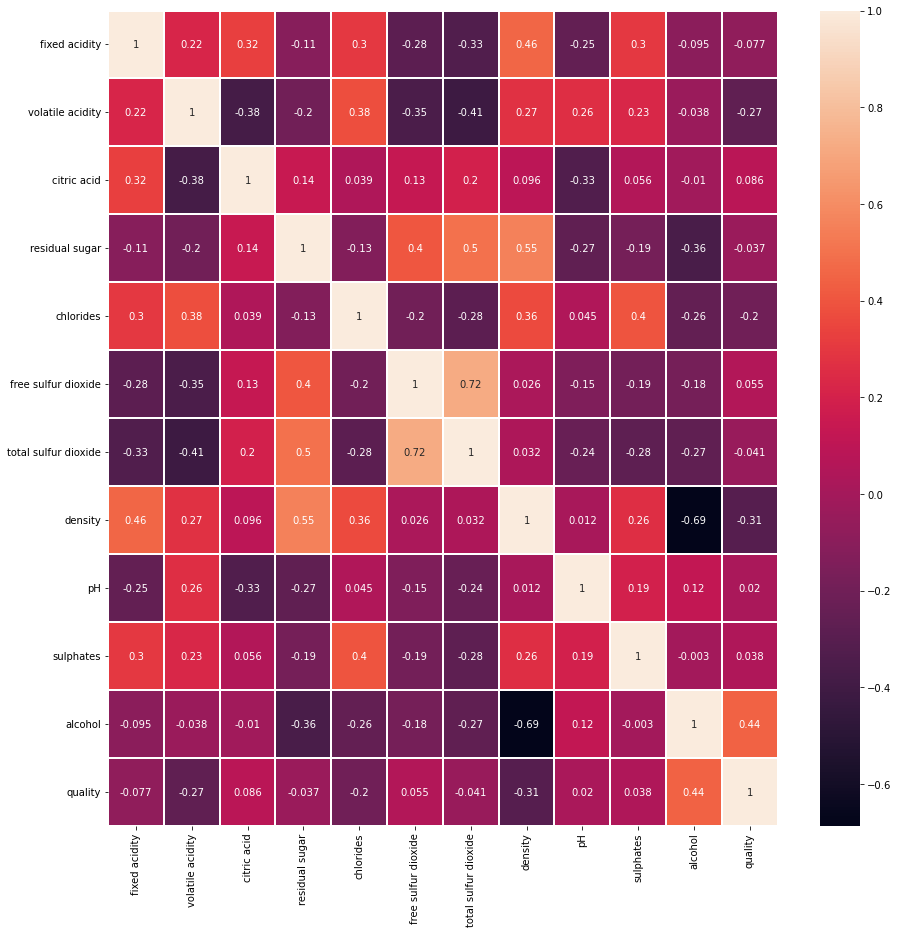

In [45]:
fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(coormat, annot=True, linewidths=.1)
plt.show()

Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1. 

Values closer to zero means there is no linear trend between the two variables. The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is. 

A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases. The diagonals are all 1/white because those squares are correlating each variable to itself (so it's a perfect correlation). 

For the rest the larger the number and lighter the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.


So in this heatmap, we can see that alcohol has a big effect on the quality.

### Is there a difference if we take the wine files individually?

Red wine correlitation

In [46]:
red_wine_corr = red_wine.corr()

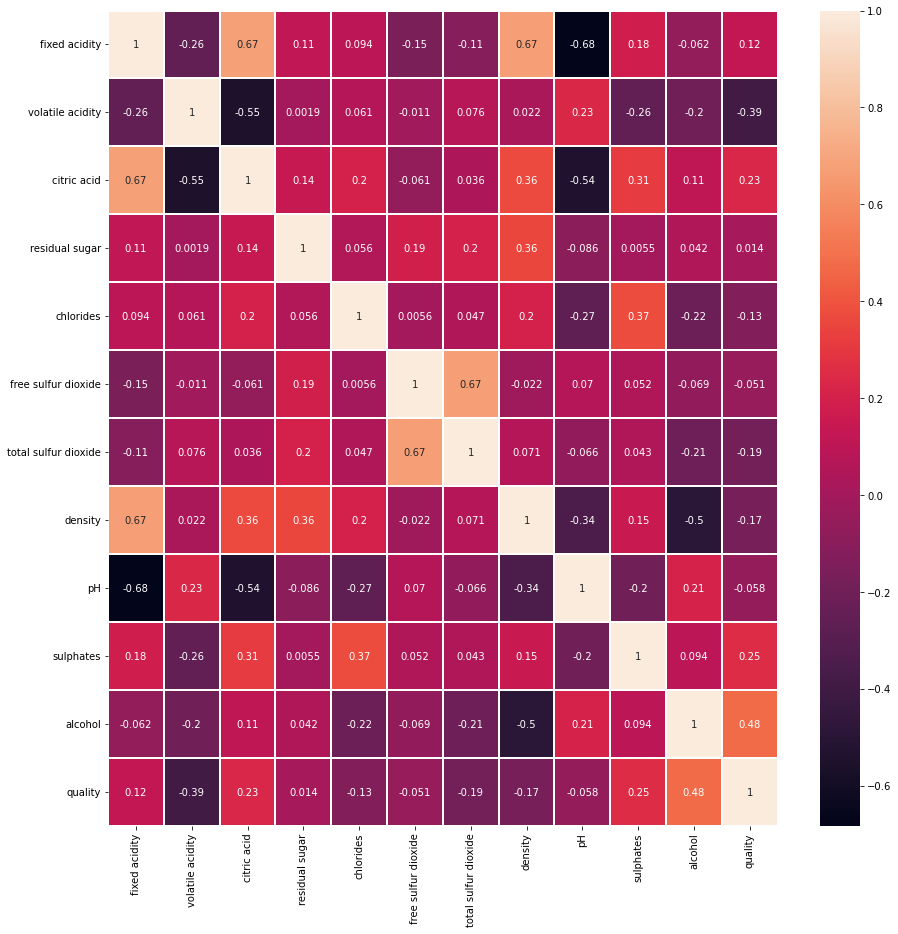

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(red_wine_corr, annot=True, linewidths=.1)

plt.show()

Still the alcohol that has the biggest impact on quality

We now check the white wine

In [48]:
w_w_coor = white_wine.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

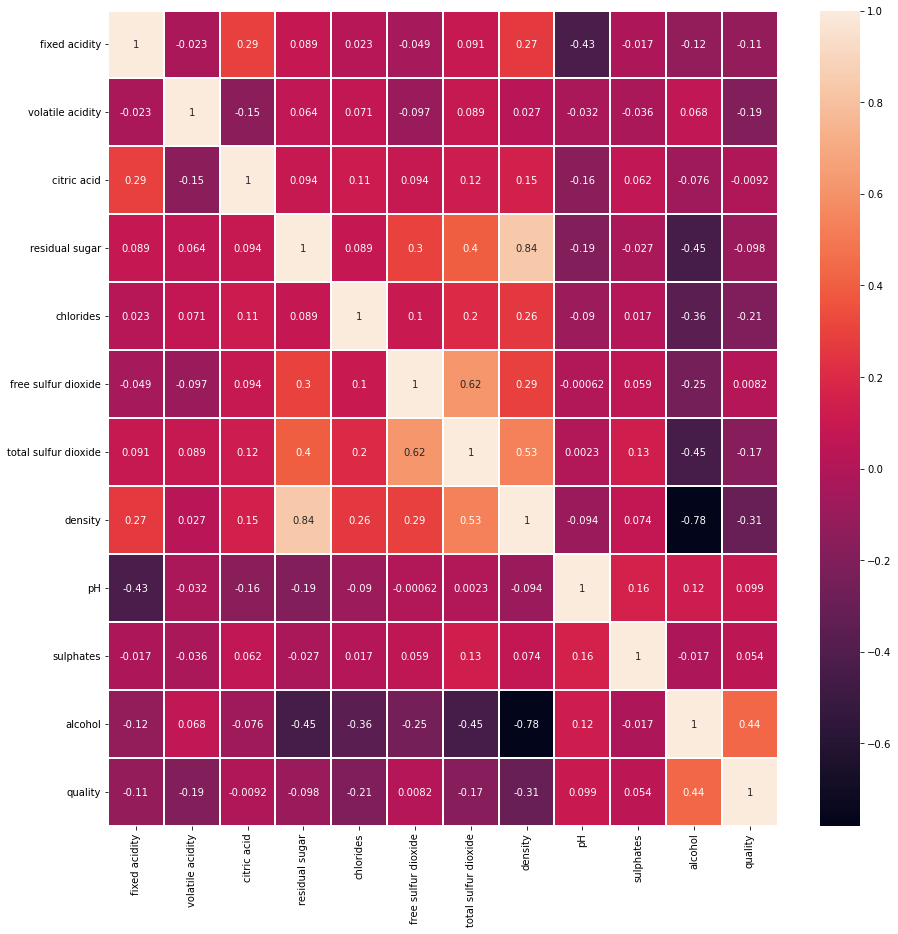

In [49]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(w_w_coor, annot=True, linewidths=.1)
plt.show

Once again the alcohol impacts the quality of the wine the most.

# Prepare the data for further analysis

### 7. Search the data for allocating

    a. missing values

    b. cells with a value of ‘0’ (zero)
    
Replace these values with the average value of their column.

#### Missing values

In [50]:
# Count the missing values

all_wines.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

No missing values in the file, lets check the indinvdual files too.

In [51]:
red_wine_corr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [52]:
w_w_coor.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Again, no missing data in these files.

#### cells with a value of ‘0’ (zero)

In [56]:
(all_wines == 0).sum(axis=0)

fixed acidity             0
volatile acidity          0
citric acid             151
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
type                      0
dtype: int64

Zero (0) values is occupying the 'citric acid' columns. 
We are going to replace these values with the mean og all 'citric acid'.

Finding the mean()

In [57]:
mean_ca = all_wines['citric acid'].mean()
mean_ca

0.3186332153301454

In [58]:
# replacing zero (0) values

all_wines['citric acid'] = all_wines['citric acid'].replace([0.0], mean_ca)

In [59]:
(all_wines == 0).sum(axis=0)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [60]:
mean_ca = all_wines['citric acid'].mean()
mean_ca

0.32603872795364197

### 8. Explore the feature ‘residual sugar’. Is there any outlier (a value much different from the rest)? On which row is it found? Remove that row.

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

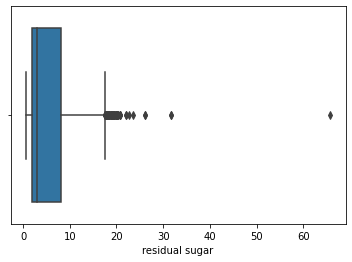

In [61]:
#Looking for outliers

sns.boxplot(all_wines['residual sugar'])

The above diagram we can see one value being off by a whole lot.

In [62]:
## position the outlier

np.where(all_wines['residual sugar']>40)

(array([4380], dtype=int64),)

In [63]:
all_wines.drop(4380, inplace=True)

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

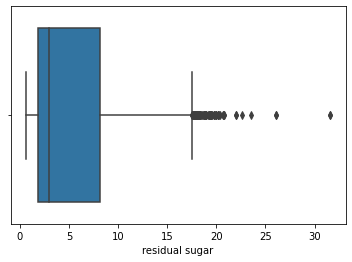

In [64]:
sns.boxplot(all_wines['residual sugar'])

In [66]:
## position the new outliers

np.where(all_wines['residual sugar']>25)

(array([3252, 3262, 5217, 5221], dtype=int64),)

In [71]:
all_wines.drop(all_wines.index[[3252, 3262, 5217, 5221]], inplace=True)

C:\tools\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='residual sugar'>

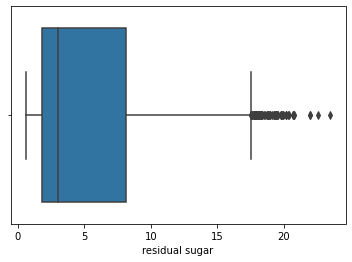

In [72]:
sns.boxplot(all_wines['residual sugar'])

#### 9. Identify the attribute with the lowest correlation to the wine quality and remove it.

<function matplotlib.pyplot.show(close=None, block=None)>

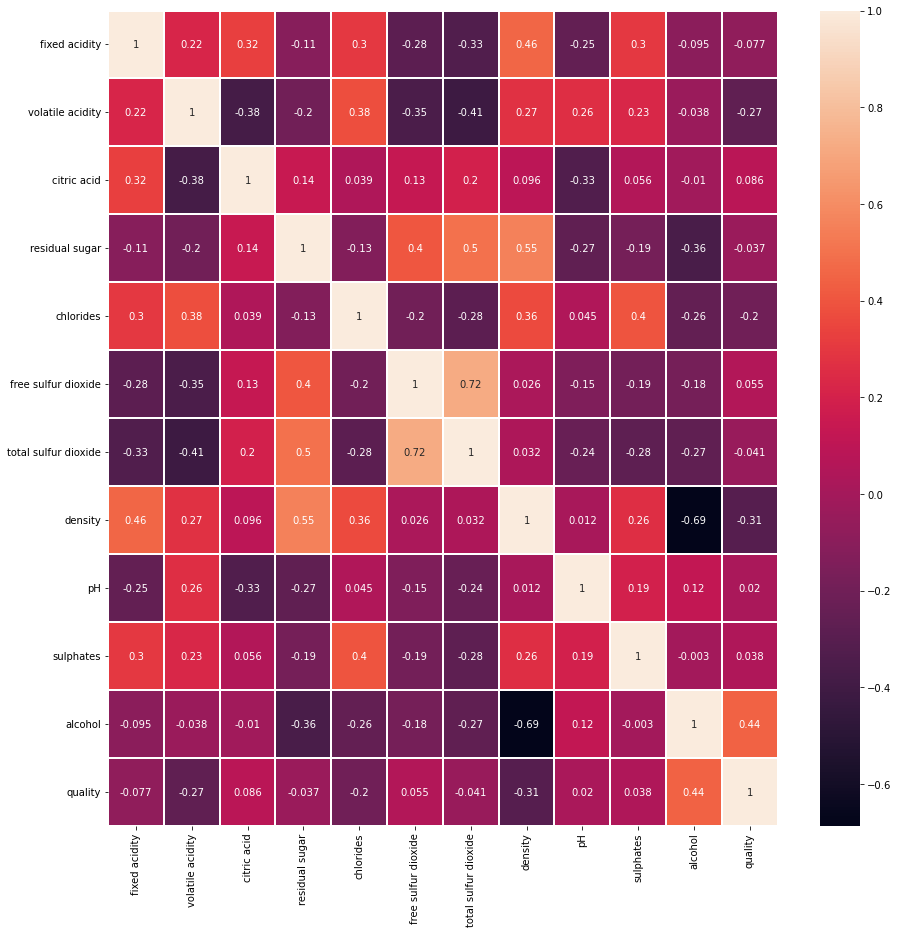

In [78]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(coormat, annot=True, linewidths=.1)
plt.show

As can be seen on the heat map, the density has the lowest impact on wine quality

In [80]:
del all_wines['density']

<function matplotlib.pyplot.show(close=None, block=None)>

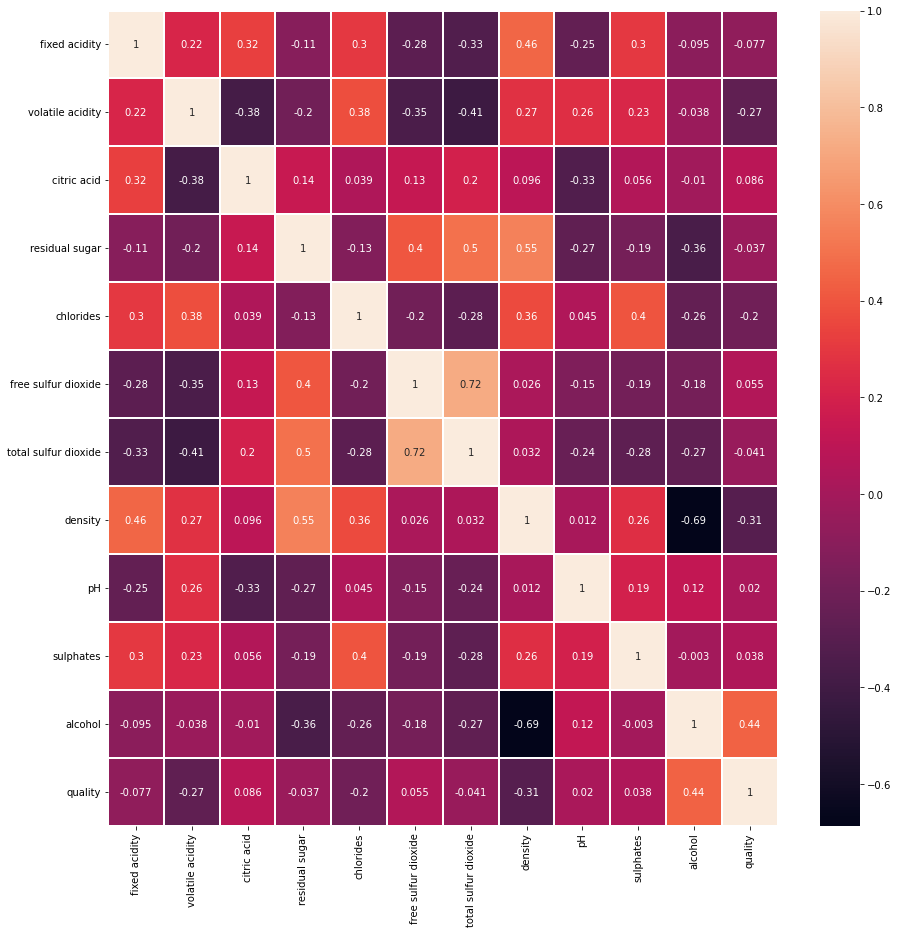

In [83]:
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.318633,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,red
1,7.8,0.88,0.318633,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,red
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,red
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,red
4,7.4,0.70,0.318633,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,red


### 10.  transform categorical data into numeric and print out the start and the end of the preprocessed data frame.

In [84]:
all_wines['type'].replace(['red', 'white'], [0,1], inplace=True)

In [85]:
all_wines.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.318633,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0
1,7.8,0.88,0.318633,2.6,0.098,25.0,67.0,3.20,0.68,9.8,5,0
2,7.8,0.76,0.040000,2.3,0.092,15.0,54.0,3.26,0.65,9.8,5,0
3,11.2,0.28,0.560000,1.9,0.075,17.0,60.0,3.16,0.58,9.8,6,0
4,7.4,0.70,0.318633,1.9,0.076,11.0,34.0,3.51,0.56,9.4,5,0


In [86]:
all_wines.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,3.34,0.38,12.8,7,1
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,3.26,0.32,11.8,6,1
